In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('./stats.csv')
df.date = pd.to_datetime(df['date'])
df.set_index(['date'], inplace=True)

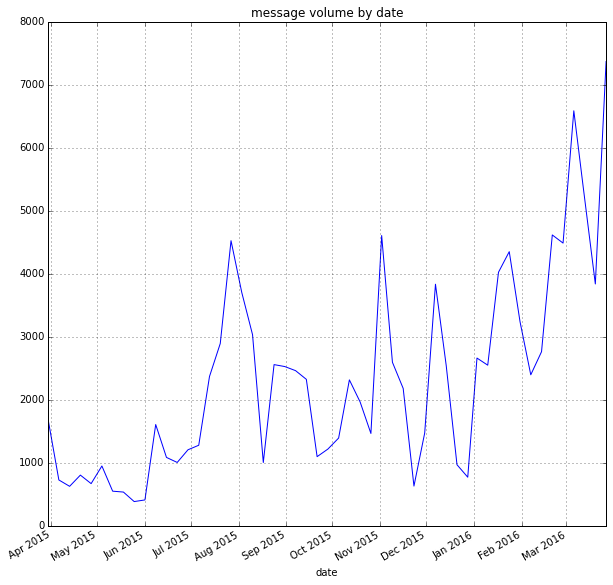

In [3]:
fig = figure(figsize=(10,10))
df['msgs_sent'].plot()
grid('on')
title('message volume by date')

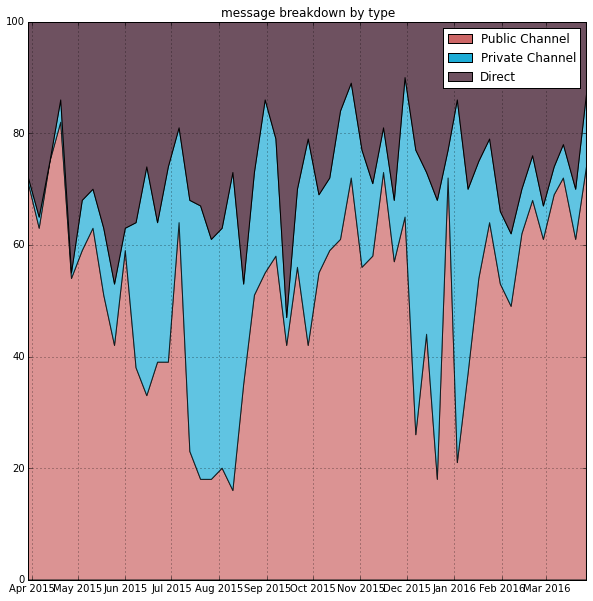

In [6]:
messages = np.vstack((df['public_msgs'], df['private_msgs'], df['direct_msgs']))
stack = np.cumsum(messages, 0)
fig = figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
x = np.arange(len(df.index))
ax1.fill_between(df.index, 0, stack[0,:], facecolor="#CC6666", alpha=.7)
ax1.fill_between(df.index, stack[0,:], stack[1,:], facecolor="#1DACD6", alpha=.7)
ax1.fill_between(df.index, stack[1,:], stack[2,:], facecolor="#6E5160")
p1 = Rectangle((0,0), 1, 1, fc='#CC6666')
p2 = Rectangle((0,0), 1, 1, fc='#1DACD6')
p3 = Rectangle((0,0), 1, 1, fc='#6E5160')
grid('on')
legend([p1, p2, p3], ['Public Channel', 'Private Channel', 'Direct'])
title('message breakdown by type')

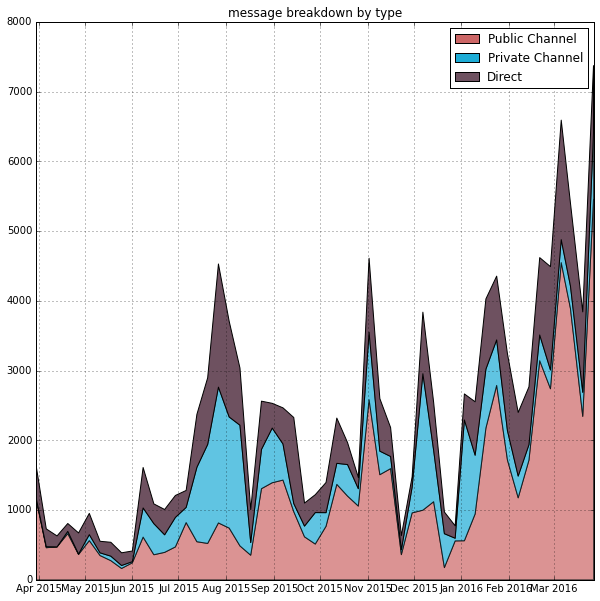

In [9]:
messages = np.vstack((df['public_msgs'] * df['msgs_sent'] / 100.0, 
                      df['private_msgs'] * df['msgs_sent'] / 100.0, 
                      df['direct_msgs'] * df['msgs_sent'] / 100.0))
stack = np.cumsum(messages, 0)
fig = figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
x = np.arange(len(df.index))
ax1.fill_between(df.index, 0, stack[0,:], facecolor="#CC6666", alpha=.7)
ax1.fill_between(df.index, stack[0,:], stack[1,:], facecolor="#1DACD6", alpha=.7)
ax1.fill_between(df.index, stack[1,:], stack[2,:], facecolor="#6E5160")
p1 = Rectangle((0,0), 1, 1, fc='#CC6666')
p2 = Rectangle((0,0), 1, 1, fc='#1DACD6')
p3 = Rectangle((0,0), 1, 1, fc='#6E5160')
grid('on')
legend([p1, p2, p3], ['Public Channel', 'Private Channel', 'Direct'])
title('message breakdown by type')

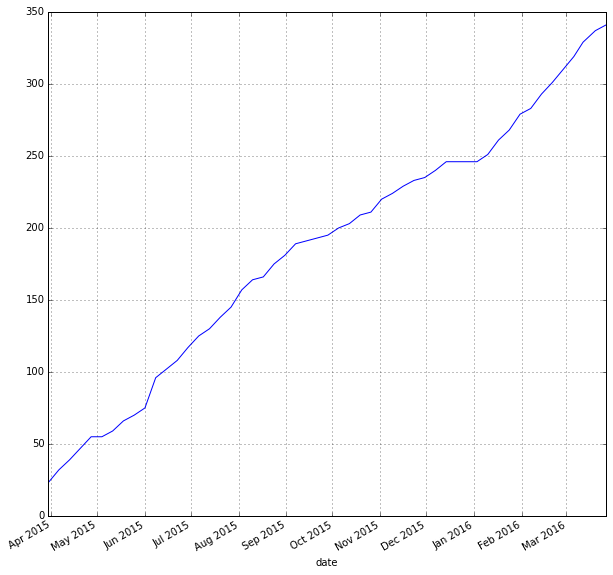

In [7]:
fig = figure(figsize=(10,10))
np.cumsum(df['added'] - df['disabled']).plot()
grid('on')